# Convolutional Neural Networks
---
In this notebook, we will explore how to use a **Convolutional Neural Network (CNN)** to classify images from the **CIFAR-10 dataset**.

The CIFAR-10 dataset consists of **60,000 32x32 color images**, divided into **10 classes** such as airplanes, cars, birds, cats, and more. CNNs are particularly effective for this task as they are designed to process grid-like data, such as images, and can efficiently capture spatial hierarchies in the data.

We will:
1. Build a CNN architecture tailored for CIFAR-10.
2. Train the network to classify images into their respective categories.
3. Evaluate the model’s performance to assess its accuracy.
4. Use a tuner for hyperparameter optimization



## Python packages

In [35]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

## Getting dataset

In [36]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [37]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

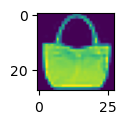

In [38]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[100])
plt.show()

## Data preprocessing

In [39]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
y_train.shape

(60000, 10)

In [42]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

input_shape = X_train.shape[1:]
X_train = X_train/255
X_test = X_test/255


In [43]:
X_train.shape

(60000, 28, 28, 1)

## Building the CNN

In [44]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", 
                      kernel_initializer=tf.keras.initializers.random_normal),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [46]:
batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
422/422 [==============================] - 5s 13ms/step - loss: 1.5609 - accuracy: 0.5096 - val_loss: 0.8835 - val_accuracy: 0.6970
Epoch 2/25
422/422 [==============================] - 5s 13ms/step - loss: 0.8228 - accuracy: 0.7036 - val_loss: 0.9029 - val_accuracy: 0.7158
Epoch 3/25
422/422 [==============================] - 5s 13ms/step - loss: 0.7082 - accuracy: 0.7399 - val_loss: 0.6527 - val_accuracy: 0.7570
Epoch 4/25
422/422 [==============================] - 5s 13ms/step - loss: 0.6440 - accuracy: 0.7621 - val_loss: 0.5868 - val_accuracy: 0.7870
Epoch 5/25
422/422 [==============================] - 5s 12ms/step - loss: 0.5941 - accuracy: 0.7805 - val_loss: 0.5809 - val_accuracy: 0.7717
Epoch 6/25
422/422 [==============================] - 5s 13ms/step - loss: 0.5539 - accuracy: 0.7964 - val_loss: 0.5327 - val_accuracy: 0.8030
Epoch 7/25
422/422 [==============================] - 5s 13ms/step - loss: 0.5265 - accuracy: 0.8086 - val_loss: 0.5127 - val_accuracy: 0.8073

## Evaluating the CNN's performance

In [47]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4021560847759247
Test accuracy: 0.8562999963760376


In [48]:
prediction = model.predict(X_test)
print("La predicción para cada imagen es un vector con 10 componentes")
print(prediction[0])

313/313 [==============================] - 0s 1ms/step
La predicción para cada imagen es un vector con 10 componentes
[9.4049528e-06 9.7032839e-08 1.1434081e-05 9.0494605e-06 8.5721722e-06
 6.7032821e-02 2.4915167e-05 1.0834816e-01 7.4503282e-03 8.1710523e-01]


In [49]:
labels = {0: "T-shirt/top", 1: "trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt",
         7: "Sneaker", 8:"Bag", 9: "Ankle boot"}

In [50]:
from sklearn.metrics import classification_report
d = classification_report(y_test.argmax(axis=1), prediction.argmax(axis=1),  target_names=labels.values())

print(d)

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.84      0.81      1000
     trouser       0.97      0.97      0.97      1000
    Pullover       0.76      0.80      0.78      1000
       Dress       0.90      0.84      0.87      1000
        Coat       0.72      0.82      0.77      1000
      Sandal       0.92      0.97      0.95      1000
       Shirt       0.67      0.52      0.59      1000
     Sneaker       0.95      0.89      0.92      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



image  1 predicts  Ankle boot
image  2 predicts  Pullover
image  3 predicts  trouser
image  4 predicts  trouser
image  5 predicts  Shirt
image  6 predicts  trouser


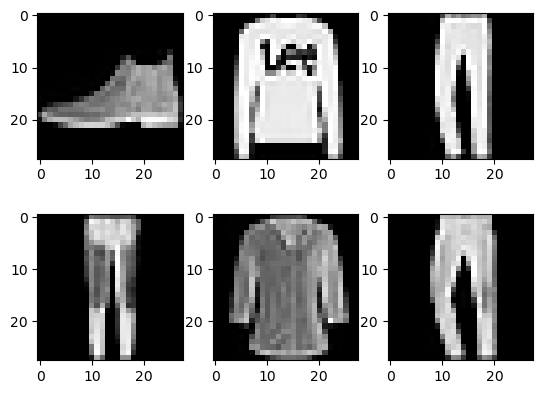

In [51]:
for i in range(1, 7):
    index_max = np.argmax(prediction[i-1,:])
    print("image ", i, "predicts ", labels[index_max])
    plt.subplot(2, 3, i)
    plt.imshow(X_test[i-1,:,:,0], cmap="gray")

## Using keras_turner for hyperparameter optimization

In [52]:
from keras_tuner.tuners import RandomSearch

In [53]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(hp.Int('input_units',
                                           min_value=64,
                                           max_value=216,
                                           step=32),
                                    (3,3), 
                                     input_shape=input_shape))
    
    
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size= (2, 2)))
    model.add(tf.keras.layers.Flatten())
    hp_dense= hp.Int('1l', min_value = 128, max_value = 512, step = 32)
    model.add(tf.keras.layers.Dense(units = hp_dense, activation='relu'))
    hp_dense2 = hp.Int ('12', min_value = 128, max_value = 512, step = 32)
    model.add(tf.keras.layers.Dense(units = hp_dense, activation='relu'))
    
    hp_lr = hp.Choice('learning_rate', values= [0.001, 0.0001])
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer="adam",
                  loss = "categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [54]:
import keras_tuner

In [55]:
tuner = RandomSearch(
    build_model,
    objective=keras_tuner.Objective('val_accuracy', direction='max'),
    max_trials = 5,
    executions_per_trial = 2,
    directory = "",
    project_name = "")

Reloading Tuner from ./untitled_project/tuner0.json


In [56]:
tuner.search(X_train, y_train, epochs=5, validation_data = (X_test, y_test))

In [57]:
y_test.shape

(10000, 10)

In [58]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
input_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 216, 'step': 32, 'sampling': 'linear'}
input_units1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 216, 'step': 32, 'sampling': 'linear'}
1l (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
12 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [59]:
final_model = tuner.get_best_models(num_models=1)

In [60]:
best_model = final_model[0]

In [61]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 192)       1920      
                                                                 
 activation (Activation)     (None, 26, 26, 192)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 192)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 32448)             0         
                                                                 
 dense (Dense)               (None, 160)               5191840   
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                        

In [153]:
score2 = best_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.442338228225708
Test accuracy: 0.8366000056266785
